In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_style("ticks")

In [2]:
#data = pd.read_csv('extracted_log.csv')
#data = pd.read_csv('extracted_log-rbm_rbm-cf_final.csv')
data = pd.read_csv('extracted_log-rbm-part-one.csv')

/home/paulo/git/RBM/venv/lib/python3.6/site-packages/ipython-7.2.0-py3.6.egg/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

evaluate     wall_time  step  measure/reconstruction/error  \
0         0  1.552239e+09     1                      0.123864   
1         1  1.552239e+09    11                      0.122772   
2         2  1.552239e+09    21                      0.117910   
3         3  1.552239e+09    31                      0.114512   
4         4  1.552239e+09    41                      0.111987   

   measure/activation/mean  measure/activation/std  measure/parameters/W/mean  \
0                 5.864385                5.772261                  -0.004844   
1                 6.040158                5.605364                  -0.027167   
2                 5.865043                4.822471                  -0.045995   
3                 6.048058                4.759377                  -0.061905   
4                 6.054641                4.422952                  -0.076068   

   measure/parameters/b_h/mean  measure/parameters/b_v/mean  \
0                    -0.141609                     0.005498   
1                    -1.314725                    -0.012838   
2                    -1.730996                    -0.029660   
3                    -1.952907                    -0.040953   
4                    -2.098953                    -0.048771   

   measure/reconstruction_1/hamming  \
0                          2.862410   
1                          2.935484   
2                          2.983542   
3                          2.959184   
4                          2.951284   

                         ...                          kfold-intern  \
0                        ...                                     0   
1                        ...                                     0   
2                        ...                                     0   
3                        ...                                     0   
4                        ...                                     0   

   batch_size  class  visible_size  hidden_size        regularization  \
0          10  RBMCF           702          250  NoRegularization-0.0   
1          10  RBMCF           702          250  NoRegularization-0.0   
2          10  RBMCF           702          250  NoRegularization-0.0   
3          10  RBMCF           702          250  NoRegularization-0.0   
4          10  RBMCF           702          250  NoRegularization-0.0   

                learning_rate  sampling_method  momentum  \
0  Adam-0.001-0.9-0.999-1e-08             CD-1       0.5   
1  Adam-0.001-0.9-0.999-1e-08             CD-1       0.5   
2  Adam-0.001-0.9-0.999-1e-08             CD-1       0.5   
3  Adam-0.001-0.9-0.999-1e-08             CD-1       0.5   
4  Adam-0.001-0.9-0.999-1e-08             CD-1       0.5   

                                                path  
0  ../results/logs_2019_03_09 _RBM_RBMCF_100_250_...  
1  ../results/logs_2019_03_09 _RBM_RBMCF_100_250_...  
2  ../results/logs_2019_03_09 _RBM_RBMCF_100_250_...  
3  ../results/logs_2019_03_09 _RBM_RBMCF_100_250_...  
4  ../results/logs_2019_03_09 _RBM_RBMCF_100_250_...  

[5 rows x 56 columns]

In [4]:
data.columns

Index(['evaluate', 'wall_time', 'step', 'measure/reconstruction/error',
       'measure/activation/mean', 'measure/activation/std',
       'measure/parameters/W/mean', 'measure/parameters/b_h/mean',
       'measure/parameters/b_v/mean', 'measure/reconstruction_1/hamming',
       'details/measure/top-1/evaluate-0/train',
       'details/measure/top-1/evaluate-0/validation',
       'details/measure/top-1/evaluate-1/train',
       'details/measure/top-1/evaluate-1/validation',
       'details/measure/top-1/evaluate-2/train',
       'details/measure/top-1/evaluate-2/validation',
       'details/measure/top-1/evaluate-3/train',
       'details/measure/top-1/evaluate-3/validation',
       'details/measure/top-1/evaluate-4/train',
       'details/measure/top-1/evaluate-4/validation',
       'details/measure/top-1/evaluate-5/train',
       'details/measure/top-1/evaluate-5/validation',
       'measure/evaluate/top-1/train', 'measure/evaluate/top-1/validation',
       'details/measure/top-5/eva

## Compare RMSE and Free Energy GAP

In [9]:
hyper_params_columns = [
    'class', 'hidden_size',
    'learning_rate', 'momentum',
    'regularization', 'batch_size', 'sampling_method',
]

metrics_columns = [
    'measure/evaluate/top-1/train',
    'measure/evaluate/top-1/validation',
    'measure/evaluate/top-5/train',
    'measure/evaluate/top-5/validation',
]

def filter_df(df, filters):
    return (df[list(filters)] == pd.Series(filters)).all(axis=1)

def plot_model(top1):
    filters = {
        'class': top1['class'],
        'hidden_size': top1['hidden_size'],
        'learning_rate': top1['learning_rate'],
        'momentum': top1['momentum'],
        'sampling_method': top1['sampling_method'],
        'batch_size': top1['batch_size'],
    }
    
    columns_new_name = [
        'Hit@1 - Base de treino',
        'Hit@1 - Base de teste',
        'Hit@5 - Base de treino',
        'Hit@5 - Base de teste',
    ]
    colors=['#223334', '#223334', 'r', 'r']
    styles=['--', '-', '--', '-']

    result = data[filter_df(data, filters)].groupby(['step']).mean()[metrics_columns]
    result.columns = columns_new_name

    ax = result.plot(style=styles, color=colors)
    ax.legend(bbox_to_anchor=(1, 1))
    ax.get_figure().suptitle(filters['class'])
    ax.set_title(filters);
    ax.set_xlabel('Época')
    ax.set_ylabel('Taxa');
    sns.despine();

def plot_column(top1, column):
    filters = {
        'class': top1['class'],
        'hidden_size': top1['hidden_size'],
        'learning_rate': top1['learning_rate'],
        'momentum': top1['momentum'],
        'sampling_method': top1['sampling_method'],
        'batch_size': top1['batch_size'],
    }
    result = data[filter_df(data, filters)].groupby(['step']).mean()[column]
    
    colors=['#223334', '#223334', 'r', 'r']
    styles=['--', '-', '--', '-']

    ax = result.plot(style=styles, color=colors)
    ax.set_title(column);

In [6]:
print("Best 5: Smallest RMSE in validation dataset")

last_epoch = data[data.evaluate==data.evaluate.max()]
top5 = last_epoch.sort_values('measure/evaluate/reconstruction/RMSE_validation', ascending=True)[['measure/evaluate/reconstruction/RMSE_validation'] + metrics_columns + hyper_params_columns].head()
top5

Best 5: Smallest RMSE in validation dataset


measure/evaluate/reconstruction/RMSE_validation  \
150                                         0.034564   
301                                         0.034660   
603                                         0.034864   
452                                         0.036332   
754                                         0.036438   

     measure/evaluate/top-1/train  measure/evaluate/top-1/validation  \
150                      0.796138                           0.239035   
301                      0.774962                           0.226316   
603                      0.714066                           0.205263   
452                      0.739631                           0.218421   
754                      0.725697                           0.219298   

     measure/evaluate/top-5/train  measure/evaluate/top-5/validation  class  \
150                      0.946346                           0.383333  RBMCF   
301                      0.946017                           0.405702  RBMCF   
603                      0.909919                           0.372807  RBMCF   
452                      0.915185                           0.352632  RBMCF   
754                      0.911345                           0.343421  RBMCF   

     hidden_size               learning_rate  momentum        regularization  \
150          250  Adam-0.001-0.9-0.999-1e-08       0.5  NoRegularization-0.0   
301          250  Adam-0.001-0.9-0.999-1e-08       0.0  NoRegularization-0.0   
603          500  Adam-0.001-0.9-0.999-1e-08       0.0  NoRegularization-0.0   
452          500  Adam-0.001-0.9-0.999-1e-08       0.5  NoRegularization-0.0   
754         1000  Adam-0.001-0.9-0.999-1e-08       0.5  NoRegularization-0.0   

     batch_size sampling_method  
150          10            CD-1  
301          10            CD-1  
603          10            CD-1  
452          10            CD-1  
754          10            CD-1

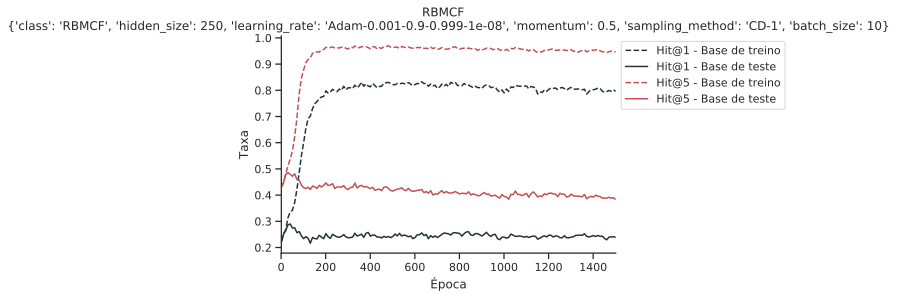

In [7]:
# Best free energy gap
plot_model(top5.iloc[0])

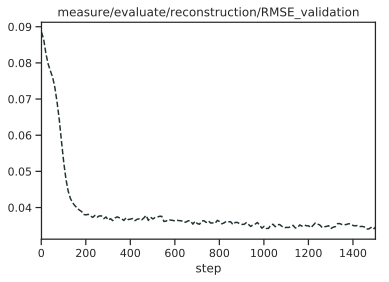

In [10]:
plot_column(top5.iloc[0], 'measure/evaluate/reconstruction/RMSE_validation')

In [11]:
print("Best 5: Biggest mean Free Energy gap between validation and a noise data")

last_epoch = data[data.evaluate==data.evaluate.max()]
top5 = last_epoch.sort_values('measure/evaluate/Free/mean_free_energy_gap', ascending=False)[['measure/evaluate/Free/mean_free_energy_gap'] + metrics_columns + hyper_params_columns].head()

top5

Best 5: Biggest mean Free Energy gap between validation and a noise data


measure/evaluate/Free/mean_free_energy_gap  \
5284                                    89.380028   
3472                                    78.623840   
1660                                    76.988144   
18874                                   69.934006   
3623                                    68.185333   

       measure/evaluate/top-1/train  measure/evaluate/top-1/validation  \
5284                       0.396752                           0.046491   
3472                       0.459732                           0.059211   
1660                       0.625850                           0.121053   
18874                      0.772767                           0.135526   
3623                       0.495721                           0.067982   

       measure/evaluate/top-5/train  measure/evaluate/top-5/validation class  \
5284                       0.413540                           0.059211   RBM   
3472                       0.484200                           0.076754   RBM   
1660                       0.666557                           0.156140   RBM   
18874                      0.856155                           0.232895   RBM   
3623                       0.555080                           0.102193   RBM   

       hidden_size               learning_rate  momentum  \
5284          1000  Adam-0.001-0.9-0.999-1e-08       0.5   
3472           500  Adam-0.001-0.9-0.999-1e-08       0.5   
1660           250  Adam-0.001-0.9-0.999-1e-08       0.5   
18874         1000   ConstantLearningRate-0.05       0.5   
3623           500  Adam-0.001-0.9-0.999-1e-08       0.0   

             regularization  batch_size sampling_method  
5284   NoRegularization-0.0          10            CD-1  
3472   NoRegularization-0.0          10            CD-1  
1660   NoRegularization-0.0          10            CD-1  
18874  NoRegularization-0.0          10            CD-1  
3623   NoRegularization-0.0          10            CD-1

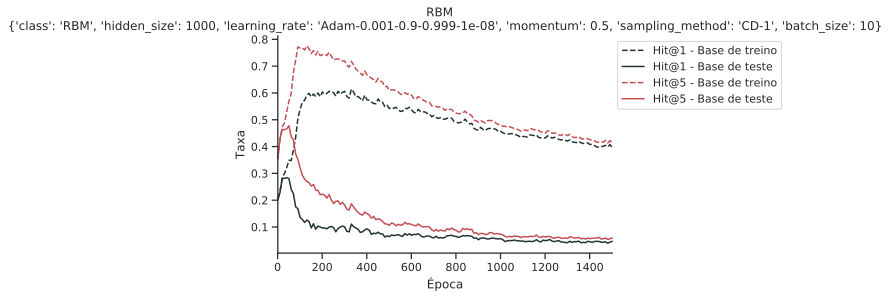

In [12]:
# Best free energy gap
plot_model(top5.iloc[0])

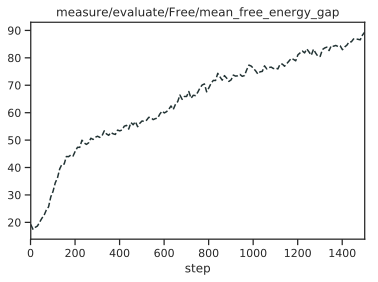

In [13]:
plot_column(top5.iloc[0], 'measure/evaluate/Free/mean_free_energy_gap')

In [14]:
print('Best 5 top-1 value in any epoch')
#last_epoch = data[data.evaluate==data.evaluate.max()]
top5 = data.sort_values('measure/evaluate/top-1/validation', ascending=False)[['evaluate'] + metrics_columns + hyper_params_columns].head()
top5

Best 5 top-1 value in any epoch


evaluate  measure/evaluate/top-1/train  \
5290         5                      0.308536   
1668         7                      0.317095   
7107        10                      0.314571   
3478         5                      0.303599   
3480         7                      0.323349   

      measure/evaluate/top-1/validation  measure/evaluate/top-5/train  \
5290                           0.296053                      0.499342   
1668                           0.295614                      0.513715   
7107                           0.294737                      0.519091   
3478                           0.294298                      0.491332   
3480                           0.294298                      0.524468   

      measure/evaluate/top-5/validation class  hidden_size  \
5290                           0.482018   RBM         1000   
1668                           0.475439   RBM          250   
7107                           0.488596   RBM          100   
3478                           0.481579   RBM          500   
3480                           0.472807   RBM          500   

                   learning_rate  momentum        regularization  batch_size  \
5290  Adam-0.001-0.9-0.999-1e-08       0.0  NoRegularization-0.0          10   
1668  Adam-0.001-0.9-0.999-1e-08       0.0  NoRegularization-0.0          10   
7107  Adam-0.001-0.9-0.999-1e-08       0.0  NoRegularization-0.0          10   
3478  Adam-0.001-0.9-0.999-1e-08       0.0  NoRegularization-0.0          10   
3480  Adam-0.001-0.9-0.999-1e-08       0.0  NoRegularization-0.0          10   

     sampling_method  
5290            CD-1  
1668            CD-1  
7107            CD-1  
3478            CD-1  
3480            CD-1

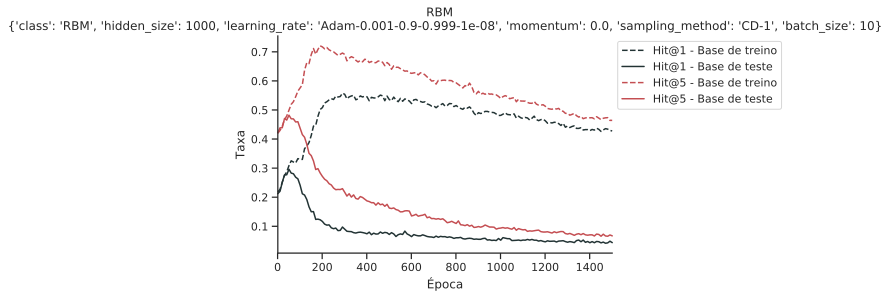

In [15]:
plot_model(top5.iloc[0])


## RMSE

In [33]:
filters = {
    'class': 'RBMCF',
    'learning_rate': 'ConstantLearningRate-0.2',
    'batch_size': 10,
    'momentum': 1,
    'sampling_method': 'CD-1',
    'hidden_size': 500
}

'''
filters = {
    'class': 'RBM',
    'learning_rate': 'ConstantLearningRate-0.1',
    'batch_size': 10,
    'momentum': 1,
    'sampling_method': 'CD-1',
    'hidden_size': 1000
}
'''

columns = [
    'measure/evaluate/top-5/train',
    'measure/evaluate/top-5/validation',
    'measure/evaluate/top-1/train',
    'measure/evaluate/top-1/validation',
    'measure/evaluate/expectation/normalized/train',
    'measure/evaluate/expectation/normalized/validation',
]
columns_new_name = [
    'Hit@5 - Base de treino',
    'Hit@5 - Base de teste',
    'Hit@1 - Base de treino',
    'Hit@1 - Base de teste',
    'Hit@1-Esperança - Base de treino',
    'Hit@1-Esperança - Base de teste',
]
colors=['#223334', '#223334', 'r', 'r', 'y', 'y']
styles=['--', '-', '--', '-', '--', '-']

result = data[filter_df(data, filters)].groupby(['step']).mean()[columns]
result.columns = columns_new_name

ax = result.plot(style=styles, color=colors)
ax.legend(bbox_to_anchor=(1, 1))
ax.get_figure().suptitle('RBM-CF')
ax.set_title(r'$\eta$=0.2, $K$=' + str(filters['hidden_size']));
ax.set_xlabel('Época')
ax.set_ylabel('Taxa');
sns.despine();
ax.get_figure().savefig("rbm-cf-metricas.pdf", bbox_inches='tight')

KeyError: "['measure/evaluate/expectation/normalized/validation', 'measure/evaluate/expectation/normalized/train'] not in index"

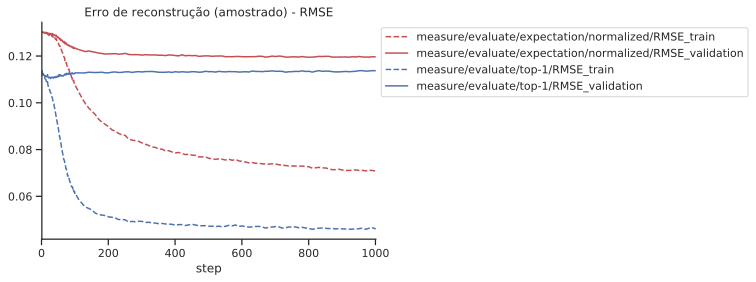

In [6]:
columns = [
    'measure/evaluate/expectation/normalized/RMSE_train',
    'measure/evaluate/expectation/normalized/RMSE_validation',
    #'measure/evaluate/top-5/RMSE_train',
    #'measure/evaluate/top-5/RMSE_validation',
    'measure/evaluate/top-1/RMSE_train',
    'measure/evaluate/top-1/RMSE_validation',
    #'measure/evaluate/top-1/train',
    #'measure/evaluate/top-1/validation'
]

styles=['r--', 'r', 'b--', 'b', ]

ax = data[filter_df(data, filters)].groupby(['step']).mean()[columns].plot(style=styles)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Erro de reconstrução (amostrado) - RMSE');
sns.despine();

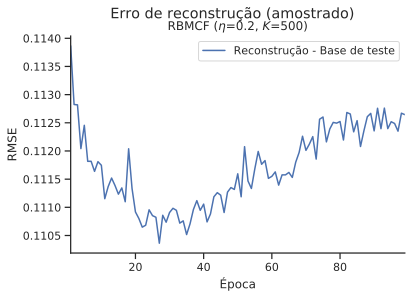

In [51]:
columns = [
    'measure/evaluate/top-1/RMSE_validation_y_predicted',
    #'measure/evaluate/top-1/RMSE_train_y_predicted'
]
columns_new_name = [
    'Reconstrução - Base de teste'
]

colors=['b']
styles=['-']

result = data[filter_df(data, filters) & (data['step']<100)].groupby(['step']).mean()[columns]
result.columns = columns_new_name

ax = result.plot(style=styles, color=colors)
ax.legend(bbox_to_anchor=(1, 1))
ax.get_figure().suptitle('Erro de reconstrução (amostrado)')
ax.set_title(filters['class'] + r' ($\eta$=0.2, $K$=' + str(filters['hidden_size']) + ')');
ax.set_xlabel('Época')
ax.set_ylabel('RMSE');
sns.despine();
ax.get_figure().savefig("rbm-cf-reconstrucao.pdf", bbox_inches='tight')

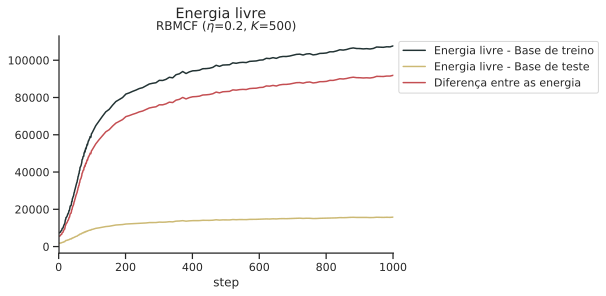

In [55]:
columns = [
    'measure/evaluate/Free/mean_free_energy_train_',
    'measure/evaluate/Free/mean_free_energy_validation',
    'measure/evaluate/Free/diff_mean_free_energy_',
]
columns_new_name = [
    'Energia livre - Base de treino',
    'Energia livre - Base de teste',
    'Diferença entre as energia'
]

styles=['#223334', 'y', 'r']

result = data[filter_df(data, filters)].groupby(['step']).mean().abs()[columns]
result.columns = columns_new_name
ax = result.plot(style=styles)
ax.get_figure().suptitle('Energia livre')
ax.set_title(filters['class'] + r' ($\eta$=0.2, $K$=' + str(filters['hidden_size']) + ')');
ax.legend(bbox_to_anchor=(1, 1))

sns.despine();
ax.get_figure().savefig("rbm-cf-energia.pdf", bbox_inches='tight')

# Best hyperparameters

In [47]:
def evaluate(column):
    parameters = ['class', 'hidden_size', 'learning_rate', 'kfold', 'kfold-intern']

    result = data \
        .groupby(parameters).max(level=column) \
        .groupby(parameters[:-1]).mean() \
        .groupby(parameters[:-2]).mean()[[column]].reset_index()
    
    result.rename(columns={column: 'mean'}, inplace=True)
    result['type'] = column
    return result

columns_evaluated = ['measure/evaluate/expectation/normalized/validation', 'measure/evaluate/top-5/validation', 'measure/evaluate/top-1/validation']

evaluation = pd.concat([evaluate(column) for column in columns_evaluated])
evaluation.head(3)
#print(accuracy.max(), accuracy.max().index)

class  hidden_size             learning_rate      mean  \
0    RBM         1000  ConstantLearningRate-0.1  0.113487   
1  RBMCF          500  ConstantLearningRate-0.2  0.167990   
0    RBM         1000  ConstantLearningRate-0.1  0.460167   

                                                type  
0  measure/evaluate/expectation/normalized/valida...  
1  measure/evaluate/expectation/normalized/valida...  
0                  measure/evaluate/top-5/validation

In [49]:
print("WRONG!!!")
evaluation.groupby(['type', 'class']).max().sort_values('mean', ascending=False)


WRONG!!!


hidden_size  \
type                                               class                
measure/evaluate/top-5/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/top-1/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/expectation/normalized/validation RBMCF          500   
                                                   RBM           1000   

                                                                     learning_rate  \
type                                               class                             
measure/evaluate/top-5/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/top-1/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/expectation/normalized/validation RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   

                                                              mean  
type                                               class            
measure/evaluate/top-5/validation                  RBMCF  0.491844  
                                                   RBM    0.460167  
measure/evaluate/top-1/validation                  RBMCF  0.287963  
                                                   RBM    0.260843  
measure/evaluate/expectation/normalized/validation RBMCF  0.167990  
                                                   RBM    0.113487

In [50]:
print('CORRECT!')

best_results = evaluation.groupby(['type', 'class', 'hidden_size', 'learning_rate']).max()
best_results.reset_index()\
    .sort_values('mean', ascending=False)\
    .drop_duplicates(['type', 'class'])\
    .set_index(['type', 'class'])
#best_results
#best_results#.idxmax()
#evaluation.groupby(['type', 'class']).max()

CORRECT!


hidden_size  \
type                                               class                
measure/evaluate/top-5/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/top-1/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/expectation/normalized/validation RBMCF          500   
                                                   RBM           1000   

                                                                     learning_rate  \
type                                               class                             
measure/evaluate/top-5/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/top-1/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/expectation/normalized/validation RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   

                                                              mean  
type                                               class            
measure/evaluate/top-5/validation                  RBMCF  0.491844  
                                                   RBM    0.460167  
measure/evaluate/top-1/validation                  RBMCF  0.287963  
                                                   RBM    0.260843  
measure/evaluate/expectation/normalized/validation RBMCF  0.167990  
                                                   RBM    0.113487

In [51]:
evaluation.groupby(['type', 'class', 'hidden_size', 'learning_rate'])\
    .max()\
    .reset_index()\
    .pivot_table(index=['type', 'class', 'learning_rate'], columns=['hidden_size'])

mean  \
hidden_size                                                                            500    
type                                               class learning_rate                        
measure/evaluate/expectation/normalized/validation RBM   ConstantLearningRate-0.1       NaN   
                                                   RBMCF ConstantLearningRate-0.2  0.167990   
measure/evaluate/top-1/validation                  RBM   ConstantLearningRate-0.1       NaN   
                                                   RBMCF ConstantLearningRate-0.2  0.287963   
measure/evaluate/top-5/validation                  RBM   ConstantLearningRate-0.1       NaN   
                                                   RBMCF ConstantLearningRate-0.2  0.491844   

                                                                                             
hidden_size                                                                            1000  
type                                               class learning_rate                       
measure/evaluate/expectation/normalized/validation RBM   ConstantLearningRate-0.1  0.113487  
                                                   RBMCF ConstantLearningRate-0.2       NaN  
measure/evaluate/top-1/validation                  RBM   ConstantLearningRate-0.1  0.260843  
                                                   RBMCF ConstantLearningRate-0.2       NaN  
measure/evaluate/top-5/validation                  RBM   ConstantLearningRate-0.1  0.460167  
                                                   RBMCF ConstantLearningRate-0.2       NaN

# Individual analisys

In [12]:
#columns = [f'details/measure/expectation/normalized/evaluate-{i}/validation' for i in range(6)]
columns = [f'details/measure/top-5/evaluate-{i}/validation' for i in range(6)]
full_columns = columns + ['measure/evaluate/expectation/normalized/train', 'measure/evaluate/expectation/normalized/validation'] \
             + ['measure/evaluate/top-1/validation', 'measure/evaluate/top-5/validation']

data[data["class"] == 'RBMCF'][full_columns].idxmax()

details/measure/top-5/evaluate-0/validation            4547
details/measure/top-5/evaluate-1/validation            7172
details/measure/top-5/evaluate-2/validation           12224
details/measure/top-5/evaluate-3/validation           10102
details/measure/top-5/evaluate-4/validation            1112
details/measure/top-5/evaluate-5/validation            3435
measure/evaluate/expectation/normalized/train          5246
measure/evaluate/expectation/normalized/validation    17977
measure/evaluate/top-1/validation                     10505
measure/evaluate/top-5/validation                     10306
dtype: int64

kfold=2/kfold-intern=1/batch_size=10/class=RBMCF/visible_size=702/hidden_size=100/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.2/sampling_method=CD-1/momentum=1/1542855678.6966267/events.out.tfevents.1542855682.paulo-notebook


Text(0.5, 1.0, 'RBM-CF - Best validation performance')

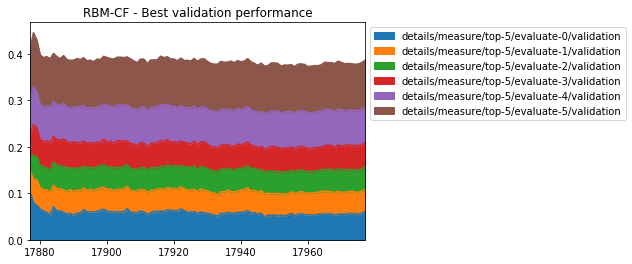

In [13]:
detail_filter = data.iloc[17977].path

print(detail_filter)
#ax = data[data['details'].str.contains(detail_filter)][full_columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM-CF - Best validation performance')

In [14]:
data[data["class"] == 'RBM'][full_columns].idxmax()

details/measure/top-5/evaluate-0/validation            1818
details/measure/top-5/evaluate-1/validation             405
details/measure/top-5/evaluate-2/validation            4451
details/measure/top-5/evaluate-3/validation            5966
details/measure/top-5/evaluate-4/validation             305
details/measure/top-5/evaluate-5/validation            2122
measure/evaluate/expectation/normalized/train         11407
measure/evaluate/expectation/normalized/validation    11406
measure/evaluate/top-1/validation                      1819
measure/evaluate/top-5/validation                      5758
dtype: int64

kfold=4/kfold-intern=0/batch_size=10/class=RBM/visible_size=702/hidden_size=1000/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.1/sampling_method=CD-1/momentum=1/1542903493.2974353/events.out.tfevents.1542903497.ff69adec0143


Text(0.5, 1.0, 'RBM - Best validation performance')

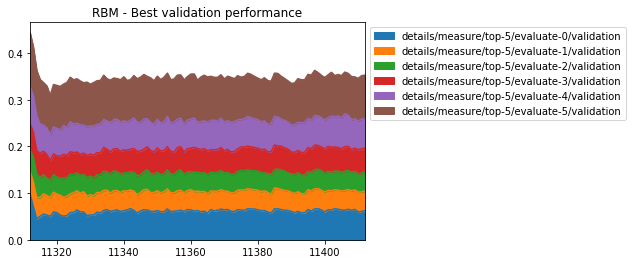

In [15]:
detail_filter = data.iloc[11406].path

print(detail_filter)
#ax = data[data['path'].str.contains(detail_filter)][columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Best validation performance')

In [16]:
#data[(data["class"] == 'RBM') & (data['path'].str.contains('id=50'))][full_columns].idxmax()

Text(0.5, 1.0, 'RBM - Validation performance to the best 5º effect in the last eppoch')

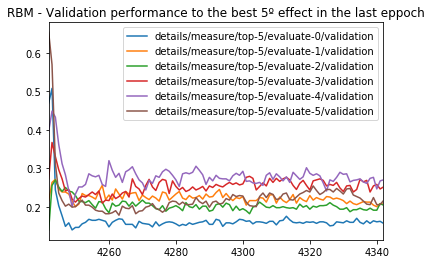

In [17]:
detail_filter = data.iloc[4278].path[7:]

ax = data[data['path'].str.contains(detail_filter)][columns].plot()
#ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Validation performance to the best 5º effect in the last eppoch')